Task 1-- Image segmentation and Object identification/ detection using Hough transform

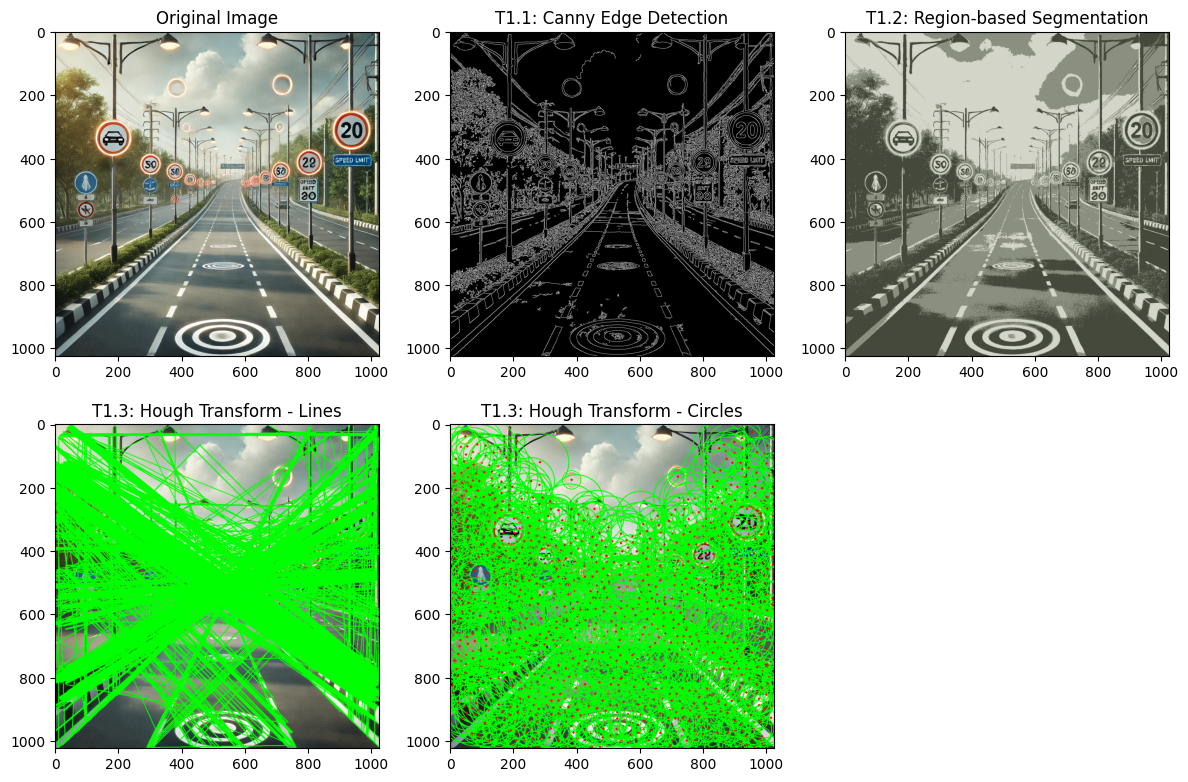

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "/content/Road image.jpeg"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

""" T1.1 - Edge-based segmentation (Canny Edge Detection)"""
edges = cv2.Canny(gray, 50, 150)

""" T1.2 - Region-based segmentation """
def region_segmentation(image, k=3):
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    _, labels, centers = cv2.kmeans(pixel_values, k, None,
                                    (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2),
                                    10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()].reshape(image.shape)

    return segmented_image

segmented_img = region_segmentation(image, k=3)

""" T1.3 - Hough Transform for Line and Circle Detection
Hough Line Transform"""
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 68, minLineLength=15, maxLineGap=250)
line_img = image.copy()

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 0), 2)

""" Hough Circle Transform"""
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=5, maxRadius=100)
circle_img = image.copy()

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(circle_img, (i[0], i[1]), i[2], (0, 255, 0), 2)
        cv2.circle(circle_img, (i[0], i[1]), 2, (0, 0, 255), 3)


plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title("Original Image")
plt.subplot(2, 3, 2), plt.imshow(edges, cmap="gray"), plt.title("T1.1: Canny Edge Detection")
plt.subplot(2, 3, 3), plt.imshow(cv2.cvtColor(segmented_img, cv2.COLOR_BGR2RGB)), plt.title("T1.2: Region-based Segmentation")
plt.subplot(2, 3, 4), plt.imshow(cv2.cvtColor(line_img, cv2.COLOR_BGR2RGB)), plt.title("T1.3: Hough Transform - Lines")
plt.subplot(2, 3, 5), plt.imshow(cv2.cvtColor(circle_img, cv2.COLOR_BGR2RGB)), plt.title("T1.3: Hough Transform - Circles")

plt.tight_layout()
plt.show()


Task 2.1--YOLO

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


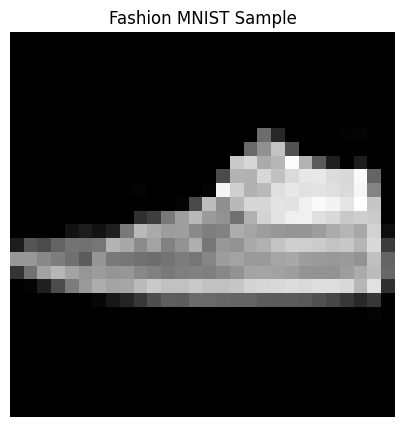


Running YOLO on Fashion MNIST...


100%|██████████| 6.25M/6.25M [00:00<00:00, 111MB/s]



image 1/1 /content/shirt.jpeg: 448x640 1 T-shirt/top, 86.6ms
Speed: 5.5ms preprocess, 86.6ms inference, 470.3ms postprocess per image at shape (1, 3, 448, 640)


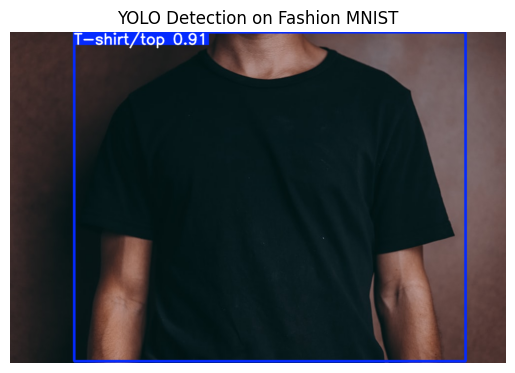

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow import keras
from ultralytics import YOLO
from PIL import Image


FASHION_CLASSES = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

def load_fashion_mnist():

    (x_train, y_train), _ = keras.datasets.fashion_mnist.load_data()
    x_train = np.expand_dims(x_train, axis=-1) / 255.0
    return x_train, y_train

def preprocess_for_yolo(image):

    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    image = cv2.resize(image, (640, 640))
    return image

def detect_with_yolo(image_path):

    model = YOLO('yolov8n.pt')


    model.model.names = FASHION_CLASSES
    image_path="/content/shirt.jpeg"

    results = model(image_path)

    for r in results:
        im_array = r.plot()
        plt.imshow(cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title("YOLO Detection on Fashion MNIST")
        plt.show()

    return results

def main_yolo():


    fashion_images, _ = load_fashion_mnist()

    fashion_idx = random.randint(0, len(fashion_images)-1)
    fashion_img = (fashion_images[fashion_idx] * 255).astype(np.uint8).squeeze()
    fashion_path = "fashion_sample.png"
    Image.fromarray(fashion_img).convert("RGB").save(fashion_path)


    plt.figure(figsize=(5, 5))
    plt.imshow(fashion_img, cmap='gray')
    plt.title("Fashion MNIST Sample")
    plt.axis('off')
    plt.show()

    print("\nRunning YOLO on Fashion MNIST...")
    fashion_img_cv = cv2.imread(fashion_path, cv2.IMREAD_GRAYSCALE)
    fashion_img_processed = preprocess_for_yolo(fashion_img_cv)
    cv2.imwrite(fashion_path, fashion_img_processed)
    yolo_results = detect_with_yolo(fashion_path)

if __name__ == "__main__":
    main_yolo()

Task 2.2-- Faster-RCNN

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


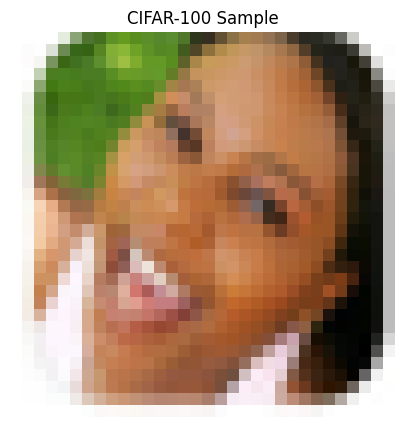


Running Faster R-CNN on CIFAR-100...


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 156MB/s]


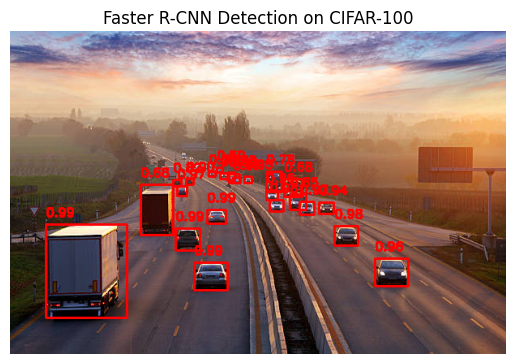

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow import keras
import torch
from torchvision import transforms, models
from PIL import Image

def load_cifar100():

    (x_train, y_train), _ = keras.datasets.cifar100.load_data()
    x_train = x_train / 255.0
    return x_train, y_train

def preprocess_for_rcnn(image):
    """Preprocess image for Faster R-CNN"""
    transform = transforms.Compose([
        transforms.ToTensor(),
    ])
    return transform(image).unsqueeze(0)

def detect_with_faster_rcnn(image_path):
    """Perform object detection using Faster R-CNN"""

    model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    model.eval()
    image_path="/content/car with road.jpg"

    image = Image.open(image_path).convert("RGB")
    image_np = np.array(image)
    image_tensor = preprocess_for_rcnn(image_np)


    with torch.no_grad():
        predictions = model(image_tensor)

    for i in range(len(predictions[0]['boxes'])):
        box = predictions[0]['boxes'][i].numpy()
        score = predictions[0]['scores'][i].item()
        if score > 0.5:
            x1, y1, x2, y2 = map(int, box)
            cv2.rectangle(image_np, (x1, y1), (x2, y2), (255, 0, 0), 2)
            label = f"{score:.2f}"
            cv2.putText(image_np, label, (x1, y1-10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)

    plt.imshow(image_np)
    plt.axis('off')
    plt.title("Faster R-CNN Detection on CIFAR-100")
    plt.show()

    return predictions

def main_rcnn():
    """Main function for Faster R-CNN implementation"""

    cifar_images, _ = load_cifar100()

    cifar_idx = random.randint(0, len(cifar_images)-1)
    cifar_img = (cifar_images[cifar_idx] * 255).astype(np.uint8)
    cifar_path = "cifar_sample.png"
    Image.fromarray(cifar_img).save(cifar_path)


    plt.figure(figsize=(5, 5))
    plt.imshow(cifar_img)
    plt.title("CIFAR-100 Sample")
    plt.axis('off')
    plt.show()

    print("\nRunning Faster R-CNN on CIFAR-100...")
    rcnn_results = detect_with_faster_rcnn(cifar_path)

if __name__ == "__main__":
    main_rcnn()

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.5/974.5 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 855.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta